In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
df_all = pd.read_csv('data/pre-selected-data.csv', delimiter='|')
df_abstract = pd.read_csv('data/unprocessed/abstract_screening_results_all.csv', delimiter=',')
df_full_text = pd.read_csv('data/unprocessed/full_test_screening_results_all.csv', delimiter=',')

In [7]:
df_abstract.head(1)

,Title,abstract,Review Status,Selection Status,Last Stage included,relative_citation_index,relevance_score,Research Question,Authors,Related Literature Review,year,DOI,venue,Related back to Literature Review,Comment,#
0,GPUCloudSim: an extension of CloudSim for mode...,Recent years have witnessed an increasing grow...,NaN,Selected,Abstract Screening,2.714286,3,NaN,"M. Momtazpour, Ahmad Siavashi",NaN,2018,10.1007/s11227-018-2636-7,Journal of Supercomputing,NaN,NaN,3


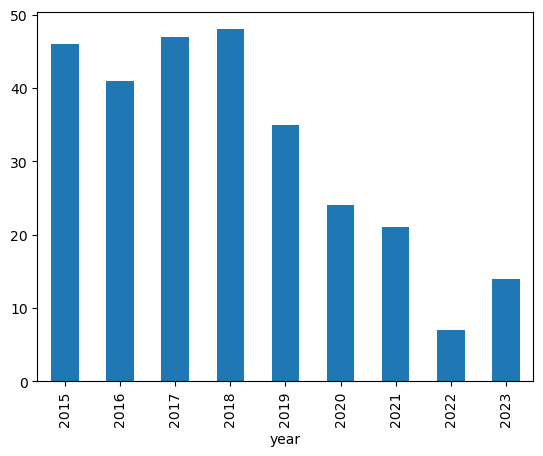

In [30]:
df_all['year'].value_counts().sort_index().plot(kind='bar')
plt.savefig('figs/publications_per_year.png')

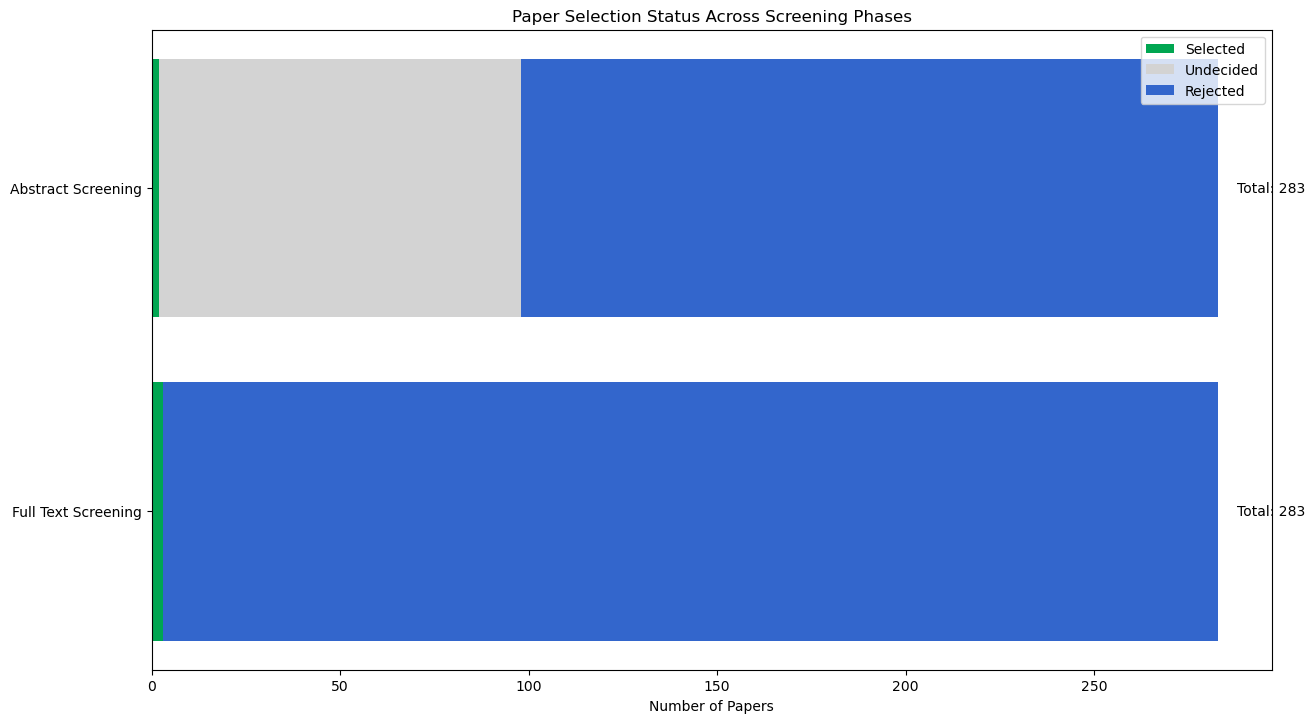

<Figure size 640x480 with 0 Axes>

In [31]:
# Analysis of selection status across dataframes

# Function to count paper selection status
def get_selection_counts(df, status_column='Selection Status'):
    if status_column not in df.columns:
        return None
    return df[status_column].value_counts()


# Get counts from each dataframe
# all_counts = get_selection_counts(df_all, 'Selection Status') if 'Selection Status' in df_all.columns else None
abstract_counts = get_selection_counts(df_abstract, 'Selection Status')
full_text_counts = get_selection_counts(df_full_text, 'Selection Status')

# Create labels from all unique statuses
all_statuses = set()
for counts in [full_text_counts, abstract_counts]:
    if counts is not None:
        all_statuses.update(counts.index)
all_statuses = list(all_statuses)

# Create data for plotting
datasets = ['Full Text Screening', 'Abstract Screening']
data = []
# for counts in [all_counts, abstract_counts, full_text_counts]:
for counts in [full_text_counts, abstract_counts]:
    if counts is not None:
        status_data = [counts.get(status, 0) for status in all_statuses]
    else:
        status_data = [0] * len(all_statuses)
    data.append(status_data)

# Create plot
fig, ax = plt.figure(figsize=(16, 8)), plt.subplot(111)
# colors = ['#00A651', '#8E8E8E', '#0072B2' ]
colors = ['#00A651', '#D3D3D3', '#3366CC' ]
bottom = np.zeros(len(datasets))

# Plot each status as a segment of the stacked bar
bars = []
for i, status in enumerate(all_statuses):
    status_data = [d[i] for d in data]
    bar = ax.barh(datasets, status_data, left=bottom, color=colors[i], label=status)
    bars.append(bar)
    bottom += status_data


# Function to add an additional bar later (can be called separately)
def add_additional_bar(ax, bars, datasets, new_data, new_label="Additional Data"):
    # Extend datasets
    datasets.append(new_label)

    # Calculate new bottom positions for the new bar
    bottom = np.zeros(1)

    # Plot each status with the same colors as the original bars
    for i, (status, bar) in enumerate(zip(all_statuses, bars)):
        ax.barh([new_label], [new_data.get(status, 0)], left=bottom, color=bar[0].get_facecolor())
        bottom += new_data.get(status, 0)

    # Update y-axis and redraw
    ax.set_yticks(range(len(datasets)))
    ax.set_yticklabels(datasets)
    plt.draw()


# Customize plot
ax.set_yticks(range(len(datasets)))
ax.set_yticklabels(datasets)
ax.set_xlabel('Number of Papers')
ax.set_title('Paper Selection Status Across Screening Phases')
ax.legend(all_statuses, loc='upper right')

# Add counts as text on bars
for i, d in enumerate(data):
    total = sum(d)
    ax.text(total + 5, i, f'Total: {total}', va='center')

# plt.tight_layout()
plt.subplots_adjust(left=0.2, right=0.9, bottom=0.1, top=0.9)  # Adjust margins manually
plt.show()
plt.savefig('figs/paper_selection_statuses.png')

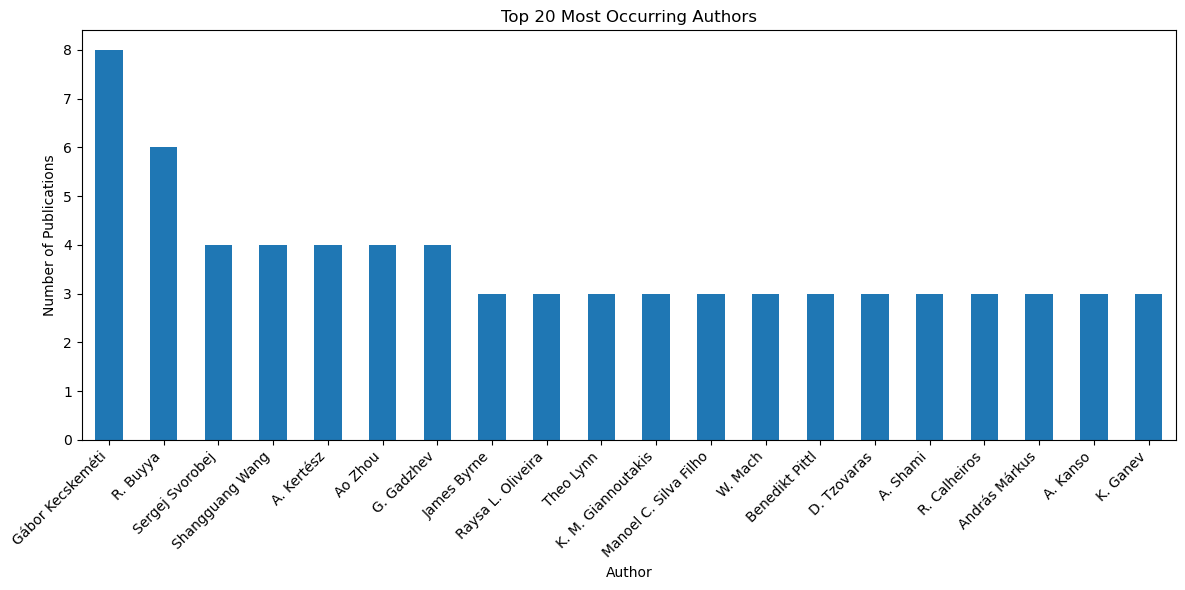

              Author  Publication Count
0   Gábor Kecskeméti                  8
1           R. Buyya                  6
2    Sergej Svorobej                  4
3    Shangguang Wang                  4
4         A. Kertész                  4
5            Ao Zhou                  4
6         G. Gadzhev                  4
7        James Byrne                  3
8  Raysa L. Oliveira                  3
9          Theo Lynn                  3


<Figure size 640x480 with 0 Axes>

In [33]:
# Analysis of most occurring authors
def extract_authors(authors_str):
    if pd.isna(authors_str):
        return []
    # Split author string on commas and clean up whitespace
    return [author.strip() for author in authors_str.split(',')]

# Create a list of all authors
all_authors = []
for authors_str in df_all['authors']:
    all_authors.extend(extract_authors(authors_str))

# Count occurrences of each author
author_counts = pd.Series(all_authors).value_counts()

# Plot the top 20 most occurring authors
plt.figure(figsize=(12, 6))
author_counts.head(20).plot(kind='bar')
plt.title('Top 20 Most Occurring Authors')
plt.xlabel('Author')
plt.ylabel('Number of Publications')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
plt.savefig('figs/author_distribution.png')

# Create a DataFrame for better visibility
top_authors_df = author_counts.head(10).reset_index()
top_authors_df.columns = ['Author', 'Publication Count']
print(top_authors_df)